### Import Dataset and Libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

In [126]:
tweets = pd.read_csv("tweets.csv")
tweets.head()

,text
0,@JoeBiden And we’ll find out who won in 2026...
1,@JoeBiden Your Democratic Nazi Party cannot be...
2,@JoeBiden So did Lying Barr
3,@JoeBiden It's clear you didnt compose this tw...
4,@JoeBiden I will vote in person thank you.


In [127]:
tweets['text'][:5]

0      @JoeBiden And we’ll find out who won in 2026...
1    @JoeBiden Your Democratic Nazi Party cannot be...
2                          @JoeBiden So did Lying Barr
3    @JoeBiden It's clear you didnt compose this tw...
4           @JoeBiden I will vote in person thank you.
Name: text, dtype: object

### Preprocessing Tweets

In [128]:
string.punctuation
remove_punc = '#$%&\'()*+,-./:;<=>@[\\]^_`{|}~'

In [160]:
sw = list(stopwords.words('english'))
sw.extend(['joebiden', 'https'])

In [161]:
remove_words = np.array(sw)

In [162]:
# import nltk
# nltk.download('punkt')
cleaned_tweets = []
lemmatizer = WordNetLemmatizer()
for tweet in tweets['text']: 
    clean = []
    lst = word_tokenize(tweet)
    for word in lst: 
        word_lowercase = word.lower()
        if (word_lowercase.isdigit() or word_lowercase.isalpha()) and (word_lowercase not in remove_words) and (word_lowercase not in remove_punc):
            clean.append(word.lower()) 
    cleaned_tweets.append(' '.join(clean))

In [163]:
cleaned_tweets[:5]

['find 2026',
 'democratic nazi party trusted',
 'lying barr',
 'clear didnt compose tweet cant put one sentence together usually last 10 minutes',
 'vote person thank']

In [164]:
tweets['cleaned_tweets'] = cleaned_tweets
tweets

,text,cleaned_tweets,positive,negative,neutral,compound,sentiment
0,@JoeBiden And we’ll find out who won in 2026...,find 2026,0.000,0.000,1.000,0.0000,neutral
1,@JoeBiden Your Democratic Nazi Party cannot be...,democratic nazi party trusted,0.744,0.000,0.256,0.7003,positive
2,@JoeBiden So did Lying Barr,lying barr,0.000,0.773,0.227,-0.5267,negative
3,@JoeBiden It's clear you didnt compose this tw...,clear didnt compose tweet cant put one sentenc...,0.175,0.082,0.742,0.3352,positive
4,@JoeBiden I will vote in person thank you.,vote person thank,0.556,0.000,0.444,0.3612,positive
...,...,...,...,...,...,...,...
2535,@JoeBiden You'll just try to calm those waters...,try calm waters lower temp corporate donors co...,0.219,0.210,0.571,0.0258,neutral
2536,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...,96 days 96 dias votjoebiden,0.000,0.000,1.000,0.0000,neutral
2537,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...,think ca remember hell unless someone staff,0.000,0.434,0.566,-0.6808,negative
2538,@JoeBiden Trump wants our children back at sch...,trump wants children back yet suggests delay e...,0.225,0.192,0.583,0.1027,positive


### Visualizing

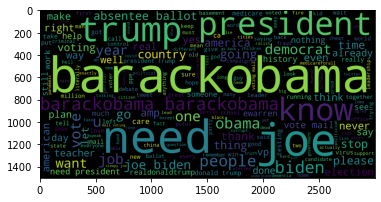

In [165]:
all_tweets = ' '.join([word for word in cleaned_tweets])
from wordcloud import WordCloud
plt.imshow(WordCloud(width = 3000, height = 1500).generate(all_tweets))
plt.show()

### Vader Sentiment Analysis

In [166]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
negative = []
neutral = []
positive = []
compound = []
for i in range(len(cleaned_tweets)):
    result = analyzer.polarity_scores(cleaned_tweets[i])
    negative.append(result.get('neg'))
    neutral.append(result.get('neu'))
    positive.append(result.get('pos'))
    compound.append(result.get('compound'))

In [167]:
tweets['positive'] = positive
tweets.head()

,text,cleaned_tweets,positive,negative,neutral,compound,sentiment
0,@JoeBiden And we’ll find out who won in 2026...,find 2026,0.000,0.000,1.000,0.0000,neutral
1,@JoeBiden Your Democratic Nazi Party cannot be...,democratic nazi party trusted,0.744,0.000,0.256,0.7003,positive
2,@JoeBiden So did Lying Barr,lying barr,0.000,0.773,0.227,-0.5267,negative
3,@JoeBiden It's clear you didnt compose this tw...,clear didnt compose tweet cant put one sentenc...,0.175,0.082,0.742,0.3352,positive
4,@JoeBiden I will vote in person thank you.,vote person thank,0.556,0.000,0.444,0.3612,positive


In [168]:
tweets['negative'] = negative
tweets.head()

,text,cleaned_tweets,positive,negative,neutral,compound,sentiment
0,@JoeBiden And we’ll find out who won in 2026...,find 2026,0.000,0.000,1.000,0.0000,neutral
1,@JoeBiden Your Democratic Nazi Party cannot be...,democratic nazi party trusted,0.744,0.000,0.256,0.7003,positive
2,@JoeBiden So did Lying Barr,lying barr,0.000,0.773,0.227,-0.5267,negative
3,@JoeBiden It's clear you didnt compose this tw...,clear didnt compose tweet cant put one sentenc...,0.175,0.082,0.742,0.3352,positive
4,@JoeBiden I will vote in person thank you.,vote person thank,0.556,0.000,0.444,0.3612,positive


In [169]:
tweets['neutral'] = neutral
tweets.head()

,text,cleaned_tweets,positive,negative,neutral,compound,sentiment
0,@JoeBiden And we’ll find out who won in 2026...,find 2026,0.000,0.000,1.000,0.0000,neutral
1,@JoeBiden Your Democratic Nazi Party cannot be...,democratic nazi party trusted,0.744,0.000,0.256,0.7003,positive
2,@JoeBiden So did Lying Barr,lying barr,0.000,0.773,0.227,-0.5267,negative
3,@JoeBiden It's clear you didnt compose this tw...,clear didnt compose tweet cant put one sentenc...,0.175,0.082,0.742,0.3352,positive
4,@JoeBiden I will vote in person thank you.,vote person thank,0.556,0.000,0.444,0.3612,positive


In [170]:
tweets['compound'] = compound
tweets.head()

,text,cleaned_tweets,positive,negative,neutral,compound,sentiment
0,@JoeBiden And we’ll find out who won in 2026...,find 2026,0.000,0.000,1.000,0.0000,neutral
1,@JoeBiden Your Democratic Nazi Party cannot be...,democratic nazi party trusted,0.744,0.000,0.256,0.7003,positive
2,@JoeBiden So did Lying Barr,lying barr,0.000,0.773,0.227,-0.5267,negative
3,@JoeBiden It's clear you didnt compose this tw...,clear didnt compose tweet cant put one sentenc...,0.175,0.082,0.742,0.3352,positive
4,@JoeBiden I will vote in person thank you.,vote person thank,0.556,0.000,0.444,0.3612,positive


In [171]:
sentiment = []
for num in tweets['compound']:
    if num >=0.05:
        sentiment.append('positive')
    elif num <=-0.05:
        sentiment.append('negative')
    elif -0.05 < num < 0.05:
        sentiment.append('neutral')

In [172]:
sentiment[:40]

['neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'negative']

In [173]:
tweets['sentiment'] = sentiment
tweets.head()

,text,cleaned_tweets,positive,negative,neutral,compound,sentiment
0,@JoeBiden And we’ll find out who won in 2026...,find 2026,0.000,0.000,1.000,0.0000,neutral
1,@JoeBiden Your Democratic Nazi Party cannot be...,democratic nazi party trusted,0.744,0.000,0.256,0.7003,positive
2,@JoeBiden So did Lying Barr,lying barr,0.000,0.773,0.227,-0.5267,negative
3,@JoeBiden It's clear you didnt compose this tw...,clear didnt compose tweet cant put one sentenc...,0.175,0.082,0.742,0.3352,positive
4,@JoeBiden I will vote in person thank you.,vote person thank,0.556,0.000,0.444,0.3612,positive


In [174]:
tweets['sentiment'].value_counts()

neutral     1192
positive     722
negative     626
Name: sentiment, dtype: int64

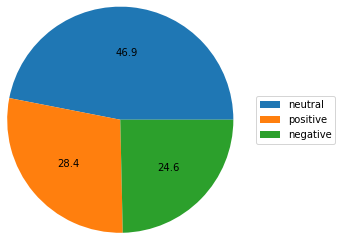

In [175]:
plt.pie(tweets['sentiment'].value_counts(), radius=1.3, autopct='%0.1f')
plt.legend(labels=tweets.sentiment.unique(), bbox_to_anchor=(1.1, 0.5), loc="center left")
plt.show()

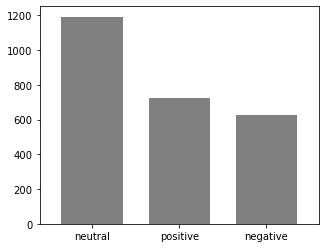

In [178]:
tweets['sentiment'].value_counts().plot(kind='bar', color='grey', width=0.7, figsize=(5, 4))
plt.xticks(rotation=360)
plt.show()

### Conclusion and Findings

The sentiment of tweets is mostly neutral. However, there are slightly more tweets with positive sentiment than negative sentiment. The main purpose of this project was to preprocess and clean tweets using lemmatizer, visualize using WordCloud, and use the Vader Sentiment Analyzer. 